<a href="https://colab.research.google.com/github/txrds/Blood-Glucose-Prediction-Competition/blob/main/Blood_Glucose_Prediction_Competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/competitions/brist1d/overview

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
train_df = pd.read_csv('/content/gdrive/MyDrive/Projetos/Kaggle/BrisT1D Blood Glucose Prediction Competition/train.csv')
test_df = pd.read_csv('/content/gdrive/MyDrive/Projetos/Kaggle/BrisT1D Blood Glucose Prediction Competition/test.csv')

<ipython-input-3-5660b1340571>:1: DtypeWarning: Columns (435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('/content/gdrive/MyDrive/Projetos/Kaggle/BrisT1D Blood Glucose Prediction Competition/train.csv')


In [25]:
train_df.head()

,id,p_num,time,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,bg-5:15,bg-5:10,bg-5:05,bg-5:00,bg-4:55,bg-4:50,bg-4:45,bg-4:40,bg-4:35,bg-4:30,bg-4:25,bg-4:20,bg-4:15,bg-4:10,bg-4:05,bg-4:00,bg-3:55,bg-3:50,bg-3:45,bg-3:40,bg-3:35,bg-3:30,bg-3:25,bg-3:20,bg-3:15,bg-3:10,bg-3:05,bg-3:00,bg-2:55,bg-2:50,bg-2:45,bg-2:40,bg-2:35,bg-2:30,bg-2:25,bg-2:20,bg-2:15,bg-2:10,bg-2:05,bg-2:00,bg-1:55,bg-1:50,bg-1:45,bg-1:40,bg-1:35,bg-1:30,bg-1:25,bg-1:20,bg-1:15,bg-1:10,bg-1:05,bg-1:00,bg-0:55,bg-0:50,bg-0:45,bg-0:40,bg-0:35,bg-0:30,bg-0:25,bg-0:20,bg-0:15,bg-0:10,bg-0:05,bg-0:00,insulin-5:55,insulin-5:50,insulin-5:45,insulin-5:40,insulin-5:35,insulin-5:30,insulin-5:25,insulin-5:20,insulin-5:15,insulin-5:10,insulin-5:05,insulin-5:00,insulin-4:55,insulin-4:50,insulin-4:45,insulin-4:40,insulin-4:35,insulin-4:30,insulin-4:25,insulin-4:20,insulin-4:15,insulin-4:10,insulin-4:05,insulin-4:00,insulin-3:55,insulin-3:50,insulin-3:45,insulin-3:40,insulin-3:35,insulin-3:30,insulin-3:25,insulin-3:20,insulin-3:15,insulin-3:10,insulin-3:05,insulin-3:00,insulin-2:55,insulin-2:50,insulin-2:45,insulin-2:40,insulin-2:35,insulin-2:30,insulin-2:25,insulin-2:20,insulin-2:15,insulin-2:10,insulin-2:05,insulin-2:00,insulin-1:55,insulin-1:50,insulin-1:45,insulin-1:40,insulin-1:35,insulin-1:30,insulin-1:25,insulin-1:20,insulin-1:15,insulin-1:10,insulin-1:05,insulin-1:00,insulin-0:55,insulin-0:50,insulin-0:45,insulin-0:40,insulin-0:35,insulin-0:30,insulin-0:25,insulin-0:20,insulin-0:15,insulin-0:10,insulin-0:05,insulin-0:00,carbs-5:55,carbs-5:50,carbs-5:45,carbs-5:40,carbs-5:35,carbs-5:30,carbs-5:25,carbs-5:20,carbs-5:15,carbs-5:10,carbs-5:05,carbs-5:00,carbs-4:55,carbs-4:50,carbs-4:45,carbs-4:40,carbs-4:35,carbs-4:30,carbs-4:25,carbs-4:20,carbs-4:15,carbs-4:10,carbs-4:05,carbs-4:00,carbs-3:55,carbs-3:50,carbs-3:45,carbs-3:40,carbs-3:35,carbs-3:30,carbs-3:25,carbs-3:20,carbs-3:15,carbs-3:10,carbs-3:05,carbs-3:00,carbs-2:55,carbs-2:50,carbs-2:45,carbs-2:40,carbs-2:35,carbs-2:30,carbs-2:25,carbs-2:20,carbs-2:15,carbs-2:10,carbs-2:05,carbs-2:00,carbs-1:55,carbs-1:50,carbs-1:45,carbs-1:40,carbs-1:35,carbs-1:30,carbs-1:25,carbs-1:20,carbs-1:15,carbs-1:10,carbs-1:05,carbs-1:00,carbs-0:55,carbs-0:50,carbs-0:45,carbs-0:40,carbs-0:35,carbs-0:30,carbs-0:25,carbs-0:20,carbs-0:15,carbs-0:10,carbs-0:05,carbs-0:00,hr-5:55,hr-5:50,hr-5:45,hr-5:40,hr-5:35,hr-5:30,hr-5:25,hr-5:20,hr-5:15,hr-5:10,hr-5:05,hr-5:00,hr-4:55,hr-4:50,hr-4:45,hr-4:40,hr-4:35,hr-4:30,hr-4:25,hr-4:20,hr-4:15,hr-4:10,hr-4:05,hr-4:00,hr-3:55,hr-3:50,hr-3:45,hr-3:40,hr-3:35,hr-3:30,hr-3:25,hr-3:20,hr-3:15,hr-3:10,hr-3:05,hr-3:00,hr-2:55,hr-2:50,hr-2:45,hr-2:40,hr-2:35,hr-2:30,hr-2:25,hr-2:20,hr-2:15,hr-2:10,hr-2:05,hr-2:00,hr-1:55,hr-1:50,hr-1:45,hr-1:40,hr-1:35,hr-1:30,hr-1:25,hr-1:20,hr-1:15,hr-1:10,hr-1:05,hr-1:00,hr-0:55,hr-0:50,hr-0:45,hr-0:40,hr-0:35,hr-0:30,hr-0:25,hr-0:20,hr-0:15,hr-0:10,hr-0:05,hr-0:00,steps-5:55,steps-5:50,steps-5:45,steps-5:40,steps-5:35,steps-5:30,steps-5:25,steps-5:20,steps-5:15,steps-5:10,steps-5:05,steps-5:00,steps-4:55,steps-4:50,steps-4:45,steps-4:40,steps-4:35,steps-4:30,steps-4:25,steps-4:20,steps-4:15,steps-4:10,steps-4:05,steps-4:00,steps-3:55,steps-3:50,steps-3:45,steps-3:40,steps-3:35,steps-3:30,steps-3:25,steps-3:20,steps-3:15,steps-3:10,steps-3:05,steps-3:00,steps-2:55,steps-2:50,steps-2:45,steps-2:40,steps-2:35,steps-2:30,steps-2:25,steps-2:20,steps-2:15,steps-2:10,steps-2:05,steps-2:00,steps-1:55,steps-1:50,steps-1:45,steps-1:40,steps-1:35,steps-1:30,steps-1:25,steps-1:20,steps-1:15,steps-1:10,steps-1:05,steps-1:00,steps-0:55,steps-0:50,steps-0:45,steps-0:40,steps-0:35,steps-0:30,steps-0:25,steps-0:20,steps-0:15,steps-0:10,steps-0:05,steps-0:00,cals-5:55,cals-5:50,cals-5:45,cals-5:40,cals-5:35,cals-5:30,cals-5:25,cals-5:20,cals-5:15,cals-5:10,cals-5:05,cals-5:00,cals-4:55,cals-4:50,cals-4:45,cals-4:40,cals-4:35,cals-4:30,cals-4:25,cals-4:20,cals-4:15,cals-4:10,cals-4:05,cals-4:00,cals-3:55,cals-3:50,cals-3:45,cals-3:40,cals-3:35,cals-3:30,cals-3:25,cal

#Analise

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177024 entries, 0 to 177023
Columns: 508 entries, id to bg+1:00
dtypes: float64(433), object(75)
memory usage: 686.1+ MB


In [20]:
pd.set_option('display.max_columns', None)

In [ ]:
pd.reset_option('display.max_columns')

In [23]:
train_df.describe()

,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,bg-5:15,bg-5:10,bg-5:05,bg-5:00,bg-4:55,bg-4:50,bg-4:45,bg-4:40,bg-4:35,bg-4:30,bg-4:25,bg-4:20,bg-4:15,bg-4:10,bg-4:05,bg-4:00,bg-3:55,bg-3:50,bg-3:45,bg-3:40,bg-3:35,bg-3:30,bg-3:25,bg-3:20,bg-3:15,bg-3:10,bg-3:05,bg-3:00,bg-2:55,bg-2:50,bg-2:45,bg-2:40,bg-2:35,bg-2:30,bg-2:25,bg-2:20,bg-2:15,bg-2:10,bg-2:05,bg-2:00,bg-1:55,bg-1:50,bg-1:45,bg-1:40,bg-1:35,bg-1:30,bg-1:25,bg-1:20,bg-1:15,bg-1:10,bg-1:05,bg-1:00,bg-0:55,bg-0:50,bg-0:45,bg-0:40,bg-0:35,bg-0:30,bg-0:25,bg-0:20,bg-0:15,bg-0:10,bg-0:05,bg-0:00,insulin-5:55,insulin-5:50,insulin-5:45,insulin-5:40,insulin-5:35,insulin-5:30,insulin-5:25,insulin-5:20,insulin-5:15,insulin-5:10,insulin-5:05,insulin-5:00,insulin-4:55,insulin-4:50,insulin-4:45,insulin-4:40,insulin-4:35,insulin-4:30,insulin-4:25,insulin-4:20,insulin-4:15,insulin-4:10,insulin-4:05,insulin-4:00,insulin-3:55,insulin-3:50,insulin-3:45,insulin-3:40,insulin-3:35,insulin-3:30,insulin-3:25,insulin-3:20,insulin-3:15,insulin-3:10,insulin-3:05,insulin-3:00,insulin-2:55,insulin-2:50,insulin-2:45,insulin-2:40,insulin-2:35,insulin-2:30,insulin-2:25,insulin-2:20,insulin-2:15,insulin-2:10,insulin-2:05,insulin-2:00,insulin-1:55,insulin-1:50,insulin-1:45,insulin-1:40,insulin-1:35,insulin-1:30,insulin-1:25,insulin-1:20,insulin-1:15,insulin-1:10,insulin-1:05,insulin-1:00,insulin-0:55,insulin-0:50,insulin-0:45,insulin-0:40,insulin-0:35,insulin-0:30,insulin-0:25,insulin-0:20,insulin-0:15,insulin-0:10,insulin-0:05,insulin-0:00,carbs-5:55,carbs-5:50,carbs-5:45,carbs-5:40,carbs-5:35,carbs-5:30,carbs-5:25,carbs-5:20,carbs-5:15,carbs-5:10,carbs-5:05,carbs-5:00,carbs-4:55,carbs-4:50,carbs-4:45,carbs-4:40,carbs-4:35,carbs-4:30,carbs-4:25,carbs-4:20,carbs-4:15,carbs-4:10,carbs-4:05,carbs-4:00,carbs-3:55,carbs-3:50,carbs-3:45,carbs-3:40,carbs-3:35,carbs-3:30,carbs-3:25,carbs-3:20,carbs-3:15,carbs-3:10,carbs-3:05,carbs-3:00,carbs-2:55,carbs-2:50,carbs-2:45,carbs-2:40,carbs-2:35,carbs-2:30,carbs-2:25,carbs-2:20,carbs-2:15,carbs-2:10,carbs-2:05,carbs-2:00,carbs-1:55,carbs-1:50,carbs-1:45,carbs-1:40,carbs-1:35,carbs-1:30,carbs-1:25,carbs-1:20,carbs-1:15,carbs-1:10,carbs-1:05,carbs-1:00,carbs-0:55,carbs-0:50,carbs-0:45,carbs-0:40,carbs-0:35,carbs-0:30,carbs-0:25,carbs-0:20,carbs-0:15,carbs-0:10,carbs-0:05,carbs-0:00,hr-5:55,hr-5:50,hr-5:45,hr-5:40,hr-5:35,hr-5:30,hr-5:25,hr-5:20,hr-5:15,hr-5:10,hr-5:05,hr-5:00,hr-4:55,hr-4:50,hr-4:45,hr-4:40,hr-4:35,hr-4:30,hr-4:25,hr-4:20,hr-4:15,hr-4:10,hr-4:05,hr-4:00,hr-3:55,hr-3:50,hr-3:45,hr-3:40,hr-3:35,hr-3:30,hr-3:25,hr-3:20,hr-3:15,hr-3:10,hr-3:05,hr-3:00,hr-2:55,hr-2:50,hr-2:45,hr-2:40,hr-2:35,hr-2:30,hr-2:25,hr-2:20,hr-2:15,hr-2:10,hr-2:05,hr-2:00,hr-1:55,hr-1:50,hr-1:45,hr-1:40,hr-1:35,hr-1:30,hr-1:25,hr-1:20,hr-1:15,hr-1:10,hr-1:05,hr-1:00,hr-0:55,hr-0:50,hr-0:45,hr-0:40,hr-0:35,hr-0:30,hr-0:25,hr-0:20,hr-0:15,hr-0:10,hr-0:05,hr-0:00,steps-5:55,steps-5:50,steps-5:45,steps-5:40,steps-5:35,steps-5:30,steps-5:25,steps-5:20,steps-5:15,steps-5:10,steps-5:05,steps-5:00,steps-4:55,steps-4:50,steps-4:45,steps-4:40,steps-4:35,steps-4:30,steps-4:25,steps-4:20,steps-4:15,steps-4:10,steps-4:05,steps-4:00,steps-3:55,steps-3:50,steps-3:45,steps-3:40,steps-3:35,steps-3:30,steps-3:25,steps-3:20,steps-3:15,steps-3:10,steps-3:05,steps-3:00,steps-2:55,steps-2:50,steps-2:45,steps-2:40,steps-2:35,steps-2:30,steps-2:25,steps-2:20,steps-2:15,steps-2:10,steps-2:05,steps-2:00,steps-1:55,steps-1:50,steps-1:45,steps-1:40,steps-1:35,steps-1:30,steps-1:25,steps-1:20,steps-1:15,steps-1:10,steps-1:05,steps-1:00,steps-0:55,steps-0:50,steps-0:45,steps-0:40,steps-0:35,steps-0:30,steps-0:25,steps-0:20,steps-0:15,steps-0:10,steps-0:05,steps-0:00,cals-5:55,cals-5:50,cals-5:45,cals-5:40,cals-5:35,cals-5:30,cals-5:25,cals-5:20,cals-5:15,cals-5:10,cals-5:05,cals-5:00,cals-4:55,cals-4:50,cals-4:45,cals-4:40,cals-4:35,cals-4:30,cals-4:25,cals-4:20,cals-4:15,cals-4:10,cals-4:05,cals-4:00,cals-3:55,cals-3:50,cals-3:45,cals-3:40,cals-3:35,cals-3:30,cals-3:25,cals-3:20,cals-3:

In [22]:
train_df.isna().sum()

,0
id,0
p_num,0
time,0
bg-5:55,27254
bg-5:50,18491
...,...
activity-0:15,174293
activity-0:10,174287
activity-0:05,174271
activity-0:00,174287


In [24]:
#Proporção de Dados Faltantes: Avalie a proporção de valores ausentes por coluna
missing_data = train_df.isnull().mean().sort_values(ascending=False)
missing_data

,0
carbs-4:30,0.985719
carbs-4:00,0.985697
carbs-4:45,0.985691
carbs-5:15,0.985686
carbs-5:30,0.985686
...,...
bg-0:00,0.015230
id,0.000000
p_num,0.000000
time,0.000000


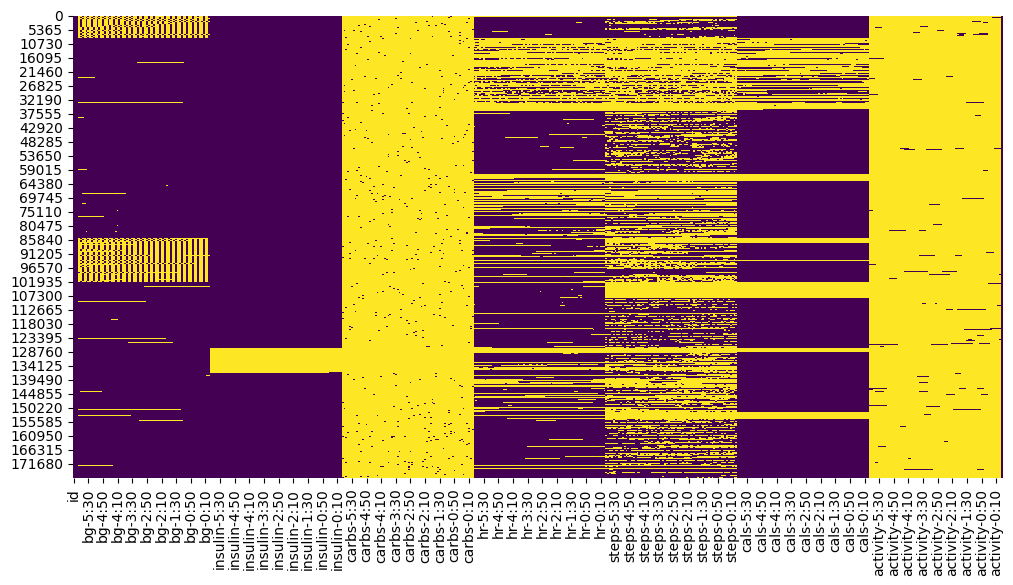

In [21]:
plt.figure(figsize=(12,6))
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')
plt.show()